## Step 1 :  Loading the dataset
The very first thing which we need to do for making machine learning model is to load the dataset , so that we could do exploratory data analysis on the data stored in dataset.

For loading the dataset and converting the data into dataframe we will use pandas library 

In [2]:
import pandas as pd
data = pd.read_csv('train.csv')
data

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


## Step 2 : Exploratory Data Analysis ( Phase 1 )
EDA also kwnown as Exploratory data analysis is one of the important of machine learning project life cycle , and is used in order to understand the data , so that we could perform feature engineering on the dataset efficiently if needed.

During exploratory data analysis , first of all we will start with some basic questions⬇️
1. What is the shape of the dataset ?
2. How dataset looks like ?
3. Datatype of features/Columns
4. Check any null values
5. See mathematical representation of dataset
6. Check any duplicate value
7. Check correlation between the features

In [3]:
# First of all we will see the shape of the dataset
data.shape

(20800, 5)

For taking a look at dataset we can use head and tail function also , but we will use sample function because in some case the top and last rows in the dataset could be similar , so in order to get correct analysis of the dataset we use sample funciton as it shows us random rows in the dataset

In [4]:
# Taking a look at the data stored in dataset
data.sample(5)

,id,title,author,text,label
10689,10689,"Brexit, Donald Trump, Jordan: Your Morning Bri...",Charles McDermid,Good morning. Here’s what you need to know: •...,0
11610,11610,Transgender Texas Boy Gets New Birth Certificate,Merrill Hope,"Born Mary Grace, a North Texas child is now...",0
5414,5414,WashPost: ’Never Trump’ Republicans Complain A...,Katie McHugh,"Since the election, “Never Trump” means never ...",0
16002,16002,Republican Leadership Considers Removing ’Prem...,Sean Moran,The GOP leadership might consider removing the...,0
822,822,Sessions’s Potential Deputy Faces a Stern Test...,Eric Lichtblau,"WASHINGTON — Known as a prosecutor, Rod...",0


In [5]:
# Checking the datatype of the features present
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
# Check any null values present in our dataset
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

By doing Exmploratory data analysis we got to know that there are significant missing values present in our dataset , thus before training our model we need to handle all the missing values.

In [7]:
# Check if there are any missing values
data.duplicated().sum()

0

### Exploratory data analysis ( Phase 2 )
In this phase we will observe our data more closely using some visuals , so for that first of all we need to import seaborn library.

C:\Users\YUVRAJ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

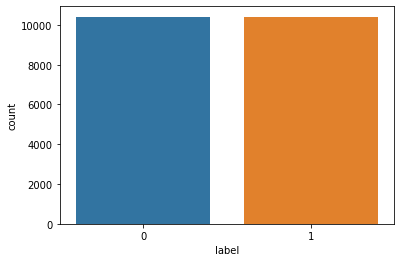

In [13]:
import seaborn as sns
sns.countplot(data['label'])

Using countplot , it seems that there is equal distribution of data , thus we will use pie chart for understanding the distribution of data

<AxesSubplot:ylabel='label'>

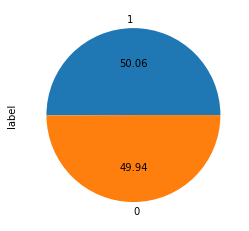

In [15]:
data['label'].value_counts().plot(kind='pie', autopct='%.2f')

## Step 3 : Processing the data
After doing the exploratory data analysis on our dataset , we got to know that there are some missing values present in our dataset and at the same time , for the prediction purpose the id and the text feature will not contribute a lot , thus we will drop these columns.

In [23]:
# Replace the missing value in the dataset with Empty string
data = data.fillna('')

In [24]:
data.isnull().sum()

title     0
author    0
label     0
dtype: int64

In [27]:
# Now we will drop the id and text columns
data = data.drop(columns=['id', 'text'])
data

,title,author,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,1
...,...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,0
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,0
20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,1


In [59]:
# Now we will sepearate the dependent feature and independent feature for doing processing ( lemmatization )
X = data.drop(columns='label')
Y = data['label']

In [60]:
print(X)
print(Y)

                                                   title  \
0      [House, Dem, Aide, :, We, Didn, ’, t, Even, Se...   
1      [FLYNN, :, Hillary, Clinton, ,, Big, Woman, on...   
2              [Why, the, Truth, Might, Get, You, Fired]   
3      [15, Civilians, Killed, In, Single, US, Airstr...   
4      [Iranian, woman, jailed, for, fictional, unpub...   
...                                                  ...   
20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799                          What Keeps the F-35 Alive   

                                          author  
0                                  Darrell Lucus  
1                                Daniel J. Flynn  
2                             Consortiumnews.com  
3                                Jessica Purkiss  
4                       

In [1]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
# Printing the stopwords in english
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\YUVRAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Data preprocessing